
# Подготовили студенты Пинкевич А., Яковлева С., Старченко К.






In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import (GridSearchCV, StratifiedKFold,
                                     cross_val_score)
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [ ]:
#Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
#Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/sample_data/MatchTimelinesFirst15.csv')

In [ ]:
df = df.drop(['matchId','Unnamed: 0'], axis='columns')
df = df.drop(['redDragonKills','blueDragonKills','redGold','blueGold','redAvgLevel','blueAvgLevel'], axis='columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48651 entries, 0 to 48650
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blue_win                 48651 non-null  int64  
 1   blueMinionsKilled        48651 non-null  float64
 2   blueJungleMinionsKilled  48651 non-null  float64
 3   redMinionsKilled         48651 non-null  float64
 4   redJungleMinionsKilled   48651 non-null  float64
 5   blueChampKills           48651 non-null  float64
 6   blueHeraldKills          48651 non-null  float64
 7   blueTowersDestroyed      48651 non-null  float64
 8   redChampKills            48651 non-null  float64
 9   redHeraldKills           48651 non-null  float64
 10  redTowersDestroyed       48651 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 4.1 MB


In [ ]:
y = df['blue_win'] # целевая переменная
X = df.drop('blue_win', axis = 1) # признаки

In [ ]:
X.shape, y.shape

((48651, 10), (48651,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=17
)

In [ ]:
first_tree = DecisionTreeClassifier(random_state=17)

In [ ]:
first_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=17)

In [ ]:
y_pred =  first_tree.predict(X_test)
print('Точность измерений (тестовые данные): ', accuracy_score(y_true = y_test, y_pred = y_pred))

Точность измерений (тестовые данные):  0.6898465332967937


In [ ]:
cross_val_score(first_tree, X_train, y_train, cv=5)
# 5 раз дерево обучилось на наших данных

array([0.68492145, 0.68771106, 0.68712377, 0.68712377, 0.69534576])

In [ ]:
# возьмем среднее от них (по сути, это среднее качество на кросс-валидации)
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5))

0.6884451622375569

Данный алгоритм показал, неплохую оценку, но важно помнить, что его минус в переобучаемости на тренировочных данных. Если не задать ему определенную глубину дерева, то оценка существенно упадет, когда мы пройдемся по тестовой выборке. Без кроссвалидации результат оказался чуточку выше, нежели с ней.

## СЛУЧАЙНЫЙ ЛЕС

In [ ]:
# Инициализируем стратифицированную разбивку нашего датасета для валидации
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Инициализируем наш классификатор с дефолтными параметрами
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)

In [ ]:
#добавил values,ибо конфликт данных был по формату
rfc.fit(X_train.values,y_train)

y_pred = rfc.predict(X_test.values)

from sklearn import metrics
print("Accuracy score: {:.2f}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy score: 77.56%


In [ ]:
# Обучаем на тренировочном датасете
results = cross_val_score(rfc, X.values, y, cv=skf)

# Оцениваем точность на тестовом датасете с помощью кросс валидации
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

CV accuracy score: 77.46%


Примерная точность получилась 77 %

In [ ]:
rfc.feature_importances_


array([0.12238015, 0.10842777, 0.12577533, 0.10920489, 0.14753405,
       0.04619881, 0.0865821 , 0.13875798, 0.04367225, 0.07146667])

In [ ]:
len(rfc.feature_importances_)

10

In [ ]:
col = [i for i in range(10)]
listValues = rfc.feature_importances_
myDict = {col[i]:listValues[i] for i in range(0, len(col), 1)} 
for key in myDict:
    print(key, '->', myDict[key])

0 -> 0.12238015173338497
1 -> 0.10842776764900824
2 -> 0.12577532794407917
3 -> 0.1092048924531047
4 -> 0.14753404602968873
5 -> 0.04619881077937732
6 -> 0.08658210277985648
7 -> 0.13875798045986704
8 -> 0.04367224841408245
9 -> 0.07146667175755102


In [ ]:
# Проверка на признаки
# если значения признака меньше 0.01 удалим его (считаем их близкими к нулю)
key_new = list()
for key in myDict:
    if myDict[key] < 0.01:
        key_new.append(key)
print(key_new) # номера столбцов которые мы будем удалять для метода ближайших соседей

[]


Можем заметить, что таких столбцов у нас нет

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48651 entries, 0 to 48650
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blue_win                 48651 non-null  int64  
 1   blueMinionsKilled        48651 non-null  float64
 2   blueJungleMinionsKilled  48651 non-null  float64
 3   redMinionsKilled         48651 non-null  float64
 4   redJungleMinionsKilled   48651 non-null  float64
 5   blueChampKills           48651 non-null  float64
 6   blueHeraldKills          48651 non-null  float64
 7   blueTowersDestroyed      48651 non-null  float64
 8   redChampKills            48651 non-null  float64
 9   redHeraldKills           48651 non-null  float64
 10  redTowersDestroyed       48651 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 4.1 MB


 Видим что в итоге наш алгоритм отобрал 10() 

In [ ]:
df1 = pd.read_csv('/content/sample_data/MatchTimelinesFirst15.csv')
df1 = df1.drop(['matchId','Unnamed: 0'], axis='columns')
df1 = df1.drop(['redDragonKills','blueDragonKills','redGold','blueGold','redAvgLevel','blueAvgLevel'], axis='columns')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48651 entries, 0 to 48650
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blue_win                 48651 non-null  int64  
 1   blueMinionsKilled        48651 non-null  float64
 2   blueJungleMinionsKilled  48651 non-null  float64
 3   redMinionsKilled         48651 non-null  float64
 4   redJungleMinionsKilled   48651 non-null  float64
 5   blueChampKills           48651 non-null  float64
 6   blueHeraldKills          48651 non-null  float64
 7   blueTowersDestroyed      48651 non-null  float64
 8   redChampKills            48651 non-null  float64
 9   redHeraldKills           48651 non-null  float64
 10  redTowersDestroyed       48651 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 4.1 MB


In [ ]:
y = df1['blue_win'] # целевая переменная
X = df1.drop('blue_win', axis = 1) # признаки
X.shape, y.shape

((48651, 10), (48651,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Инициализируем валидацию
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

# Обучаем на тренировочном датасете
for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train.values, y_train)
        temp_train_acc.append(rfc.score(X_train.values, y_train))
        temp_test_acc.append(rfc.score(X_test.values, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:554: UserWarning: Some inputs do not have OOB scores. Thi

Best accuracy on CV is 77.46% with 100 trees


Лучшая точность 77.46% на 100 деревьев

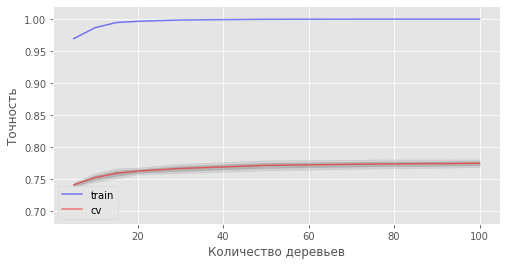

In [ ]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.68,1.02])
ax.set_ylabel("Точность")
ax.set_xlabel("Количество деревьев");

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with

Best accuracy on CV is 77.90% with 11 max_depth


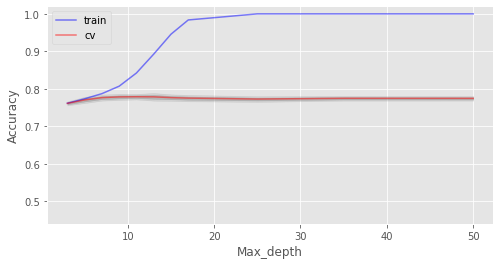

In [ ]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 25, 35, 50]

# Обучаем на тренировочном датасете
for max_depth in max_depth_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, oob_score=True, max_depth=max_depth)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_depth".format(max(test_acc.mean(axis=1))*100, 
                                                        max_depth_grid[np.argmax(test_acc.mean(axis=1))]))

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_depth_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.44,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_depth");

Параметр max_depth хорошо справляется с регуляризацией модели, и мы уже не так сильно переобучаемся.

Еще важный параметр min_samples_leaf, он так же выполняет функцию регуляризатора.

In [ ]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Обучаем на тренировочном датасете
for min_samples_leaf in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, min_samples_leaf=min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} min_samples_leaf".format(max(test_acc.mean(axis=1))*100, 
                                                        min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with

Best accuracy on CV is 77.97% with 22 min_samples_leaf


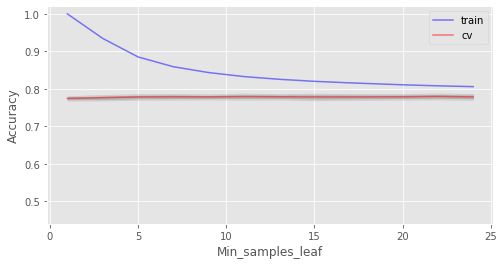

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(min_samples_leaf_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(min_samples_leaf_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.44,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Min_samples_leaf");

В данном случае мы не выигрываем в точности на валидации.

Рассмотрим такой параметр как max_features. Для задач классификации по умолчанию используется $\large \sqrt{n}$, где n — число признаков. Давайте проверим, оптимально ли в нашем случае использовать 4 признаков или нет.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with

Best accuracy on CV is 77.30% with 2 max_features


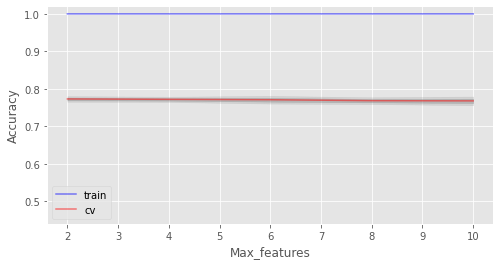

In [ ]:
 
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_features_grid = [2, 4, 6, 8,10]

# Обучаем на тренировочном датасете
for max_features in max_features_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, max_features=max_features)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_features".format(max(test_acc.mean(axis=1))*100, 
                                                        max_features_grid[np.argmax(test_acc.mean(axis=1))]))

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_features_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_features_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.44,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_features");

В нашем случае оптимальное число признаков — 2, именно с таким значением достигается наилучший результат.

# градиентный бустнинг

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
%%time
!pip install catboost
from catboost import CatBoostRegressor
import numpy as np

scores = np.ndarray([10, 10])
for i, n_trees in enumerate(np.linspace(1, 100, 10)):
    for j, depth in enumerate(np.arange(2, 12)):
        p = CatBoostRegressor(n_estimators=n_trees, max_depth=depth).fit(X_train, y_train).predict(X_test)
        scores[i, j] = mean_squared_error(y_test, p)

Выходные данные были обрезаны до нескольких последних строк (5000).
1:	learn: 0.4282573	total: 6.74ms	remaining: 70.7ms
2:	learn: 0.4157903	total: 10.2ms	remaining: 68.1ms
3:	learn: 0.4087170	total: 13.7ms	remaining: 65ms
4:	learn: 0.4036843	total: 17.1ms	remaining: 61.6ms
5:	learn: 0.4010790	total: 20.5ms	remaining: 58.2ms
6:	learn: 0.3988338	total: 23.9ms	remaining: 54.6ms
7:	learn: 0.3974950	total: 27.4ms	remaining: 51.3ms
8:	learn: 0.3967995	total: 30.6ms	remaining: 47.6ms
9:	learn: 0.3962637	total: 33.9ms	remaining: 44.1ms
10:	learn: 0.3958605	total: 37.2ms	remaining: 40.6ms
11:	learn: 0.3950140	total: 40.7ms	remaining: 37.3ms
12:	learn: 0.3945593	total: 44ms	remaining: 33.8ms
13:	learn: 0.3942429	total: 47.1ms	remaining: 30.3ms
14:	learn: 0.3940572	total: 50.2ms	remaining: 26.8ms
15:	learn: 0.3938291	total: 53.4ms	remaining: 23.4ms
16:	learn: 0.3935813	total: 56.8ms	remaining: 20ms
17:	learn: 0.3932301	total: 60ms	remaining: 16.7ms
18:	learn: 0.3929187	total: 63.5ms	remaining: 13

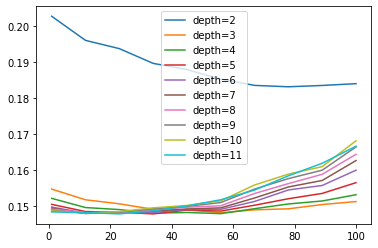

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

for i in range(scores.shape[0]):
    plt.plot(np.linspace(1, 100, 10), scores[i], label='depth=' + str(np.arange(2, 12)[i]))
plt.legend()

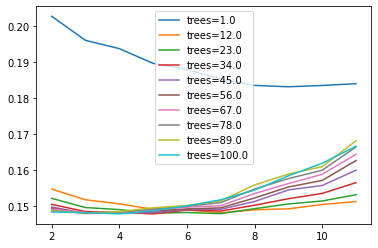

In [ ]:
for i in range(scores.shape[1]):
    plt.plot(np.arange(2, 12), scores[i], label='trees=' + str(np.linspace(1, 100, 10)[i]))
plt.legend()

In [ ]:
%%time

from sklearn.ensemble import RandomForestRegressor

linear_preds = RandomForestRegressor(max_depth = 20, max_features = 10, min_samples_leaf = 1).fit(X_train, y_train).predict(X_test)
res5 = mean_squared_error(y_test, linear_preds) ** 0.5
print(res5)

0.393961191409914
CPU times: user 15.5 s, sys: 47.2 ms, total: 15.5 s
Wall time: 19.8 s
